<strong> <i><h4>Author: Vivek Prakash </h4></i></strong>


<font size="70"><b>Weather Classification</b></font>

# Introduction
Weather classification is a critical task in meteorology, impacting various sectors including agriculture, transportation, and disaster management. Accurate weather predictions help in making informed decisions and preparing for adverse conditions. This project aims to predict the type of weather using a variety of machine learning models based on historical weather data.

The dataset contains several features that describe different aspects of the weather, both numerical (e.g., temperature, humidity) and categorical (e.g., season, location). By leveraging these features, the project builds and evaluates multiple classification models to identify the most accurate and robust predictors of weather type.



The dataset includes the following features:

* `Temperature`: The ambient temperature measured in degrees Celsius.
* `Humidity`: The percentage of humidity in the air.
* `Wind Speed`: The speed of the wind measured in kilometers per hour (km/h).
* `Precipitation (%)`: The probability of precipitation expressed as a percentage.
* `Cloud Cover`: the cloud cover is categorical and  has values like partly cloudy, clear, overcast, cloudy.
* `Atmospheric Pressure`: The pressure exerted by the atmosphere at a given point, measured in hectopascals (hPa).
* `UV Index`: The level of ultraviolet radiation exposure.
* `Visibility (km)`: The distance one can see as determined by light and weather conditions, measured in kilometers.
* `Season`: The time of the year, categorized into distinct seasons (Winter, Spring, Summer, Autumn).
* `Location`: The geographic location where the weather data was collected like inland, mountain or coastal.
* `Weather Type`: The classification label for the type of weather, which is the target variable for prediction and has values like Rainy, Cloudy, Sunny or Snowy.y']

In [341]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
weather_df = pd.read_csv('weather_classification_data.csv')
weather_df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


# Exploratory Data Analysis

In [61]:
weather_df.shape

(13200, 11)

In [63]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [65]:
weather_df[weather_df.duplicated()].count()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

No duplicate rows are present.

In [30]:
numerical = [i for i in weather_df.columns if weather_df[i].dtype != 'object']
numerical

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

These are the features with numerical data.

In [36]:
categorical = [i for i in weather_df.columns if weather_df[i].dtype == 'object']
categorical

['Cloud Cover', 'Season', 'Location', 'Weather Type']

There are the categorical features.

In [32]:
weather_df[numerical].describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [202]:
for i in categorical:
    k = weather_df[i].unique()
    print(i , ":" , k)

Cloud Cover : ['partly cloudy' 'clear' 'overcast' 'cloudy']
Season : ['Winter' 'Spring' 'Summer' 'Autumn']
Location : ['inland' 'mountain' 'coastal']
Weather Type : ['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [40]:
weather_df[categorical].describe().T

,count,unique,top,freq
Cloud Cover,13200,4,overcast,6090
Season,13200,4,Winter,5610
Location,13200,3,inland,4816
Weather Type,13200,4,Rainy,3300


<Axes: >

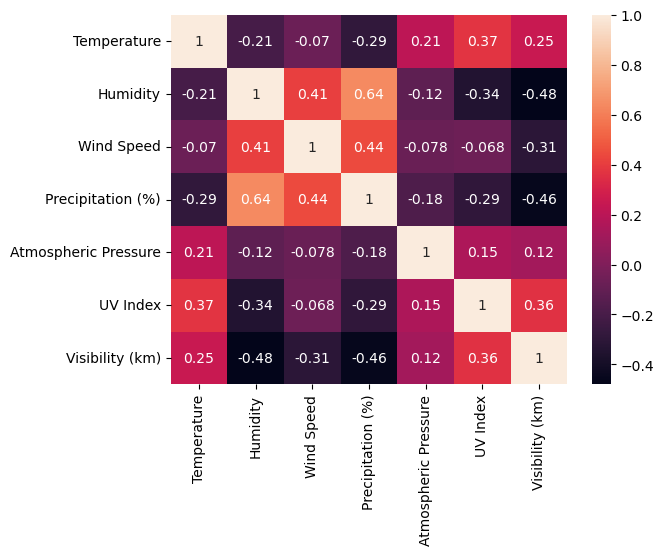

In [103]:
numerical_data = weather_df[numerical]
c1= numerical_data.corr()
sns.heatmap(c1 , annot = True )

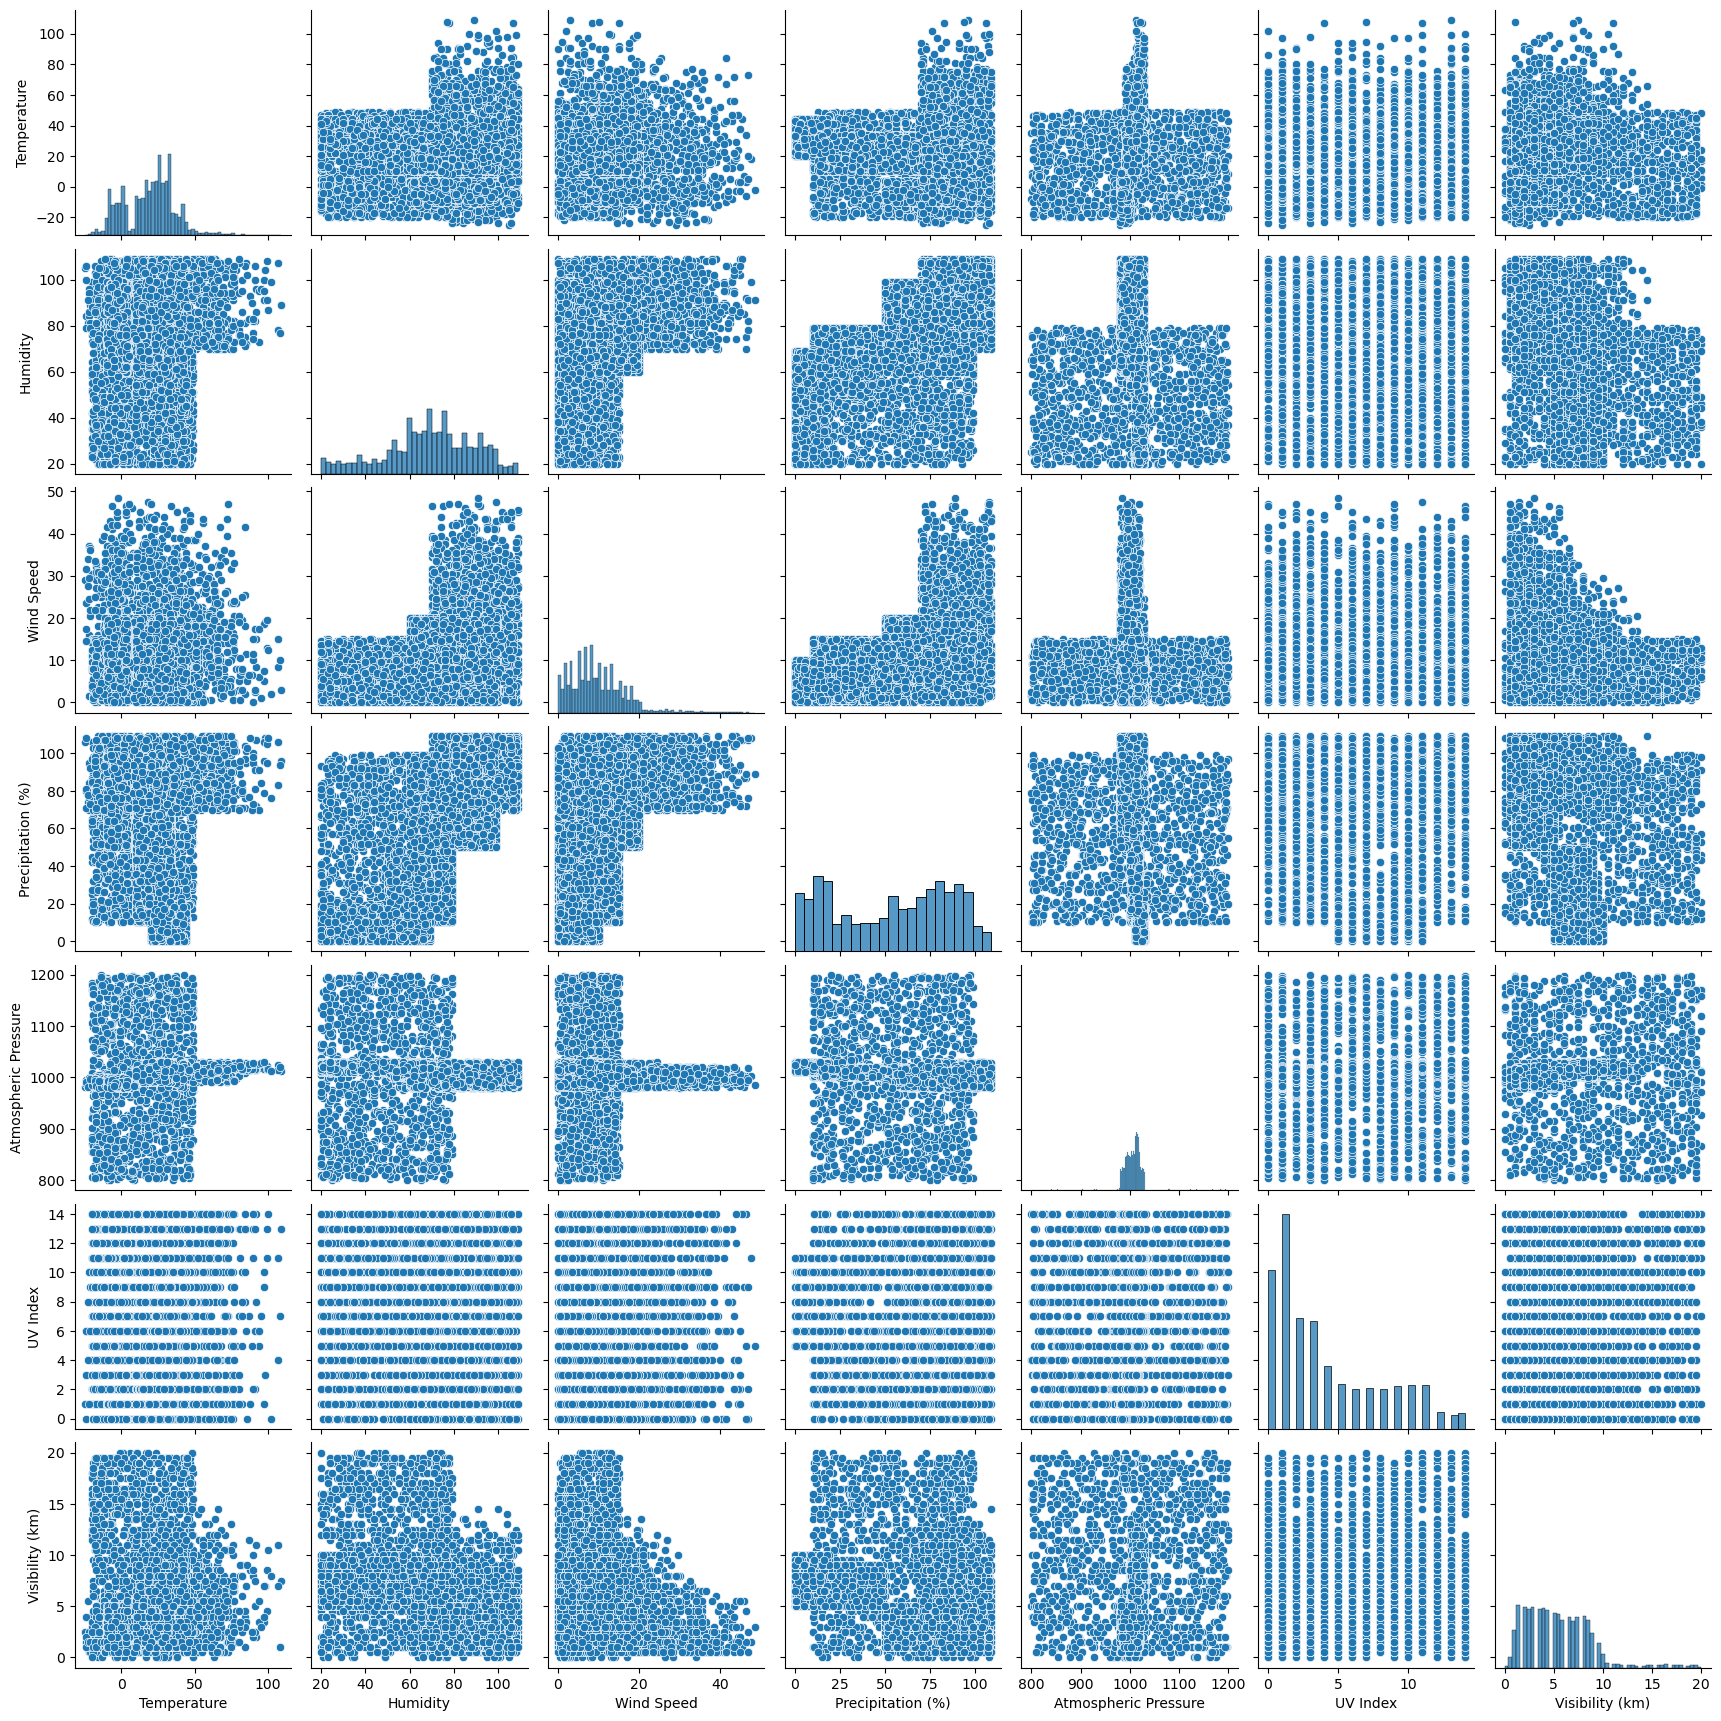

In [149]:
sns.pairplot(weather_df[numerical])

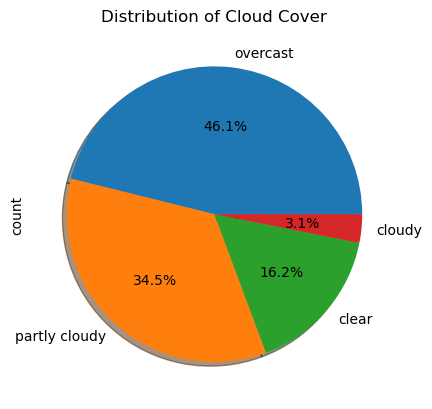

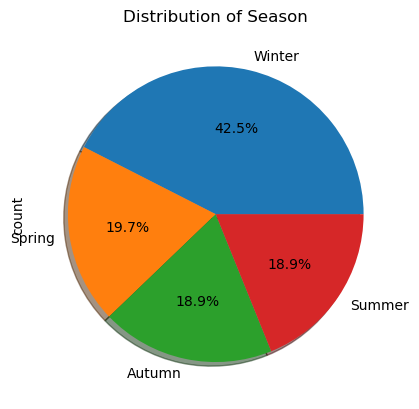

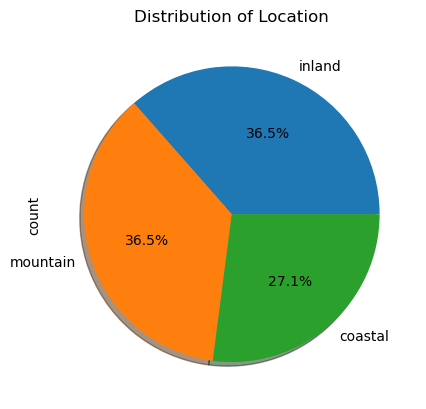

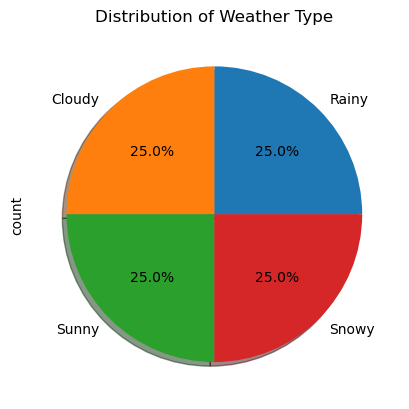

In [185]:
for i in categorical:
    plt.figure()
    weather_df[i].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,)
    plt.title(f'Distribution of {i}')
    plt.show() 

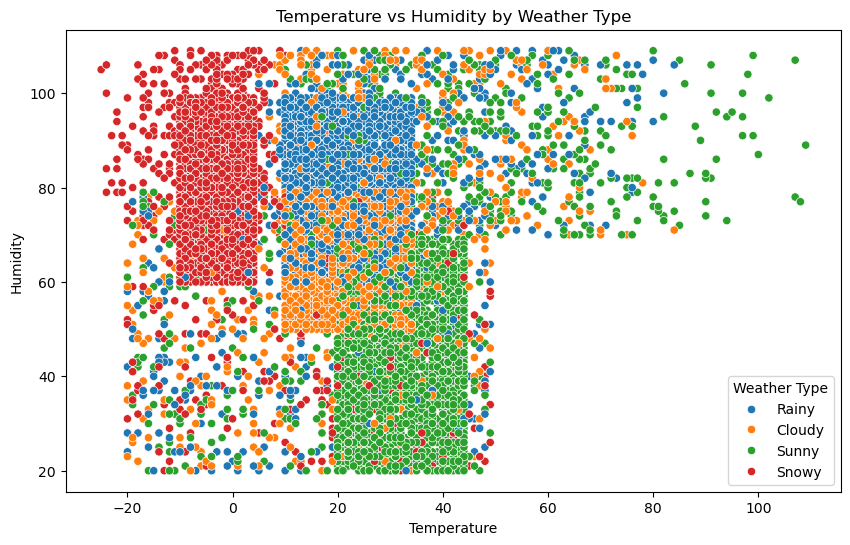

In [187]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_df, x='Temperature', y='Humidity', hue='Weather Type')
plt.title('Temperature vs Humidity by Weather Type')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(title='Weather Type')
plt.show()

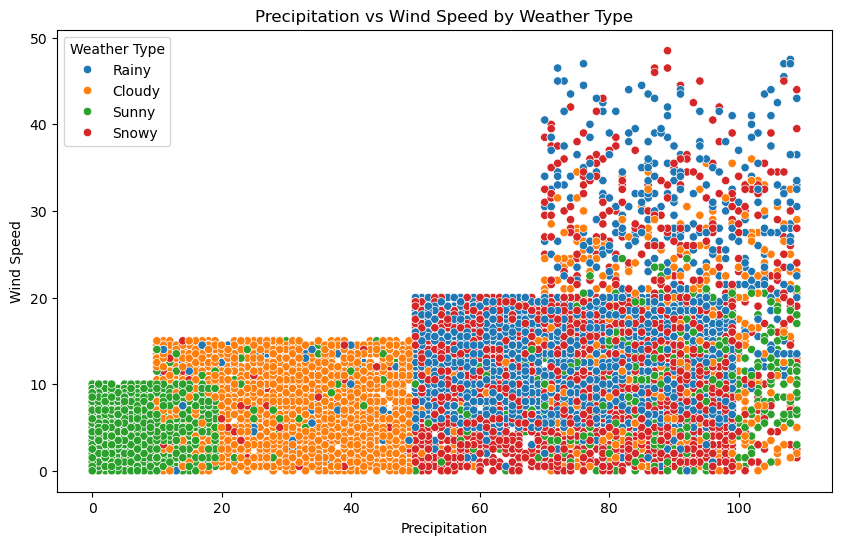

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_df, x='Precipitation (%)', y='Wind Speed', hue='Weather Type')
plt.title('Precipitation vs Wind Speed by Weather Type')
plt.xlabel('Precipitation')
plt.ylabel('Wind Speed')
plt.legend(title='Weather Type')
plt.show()

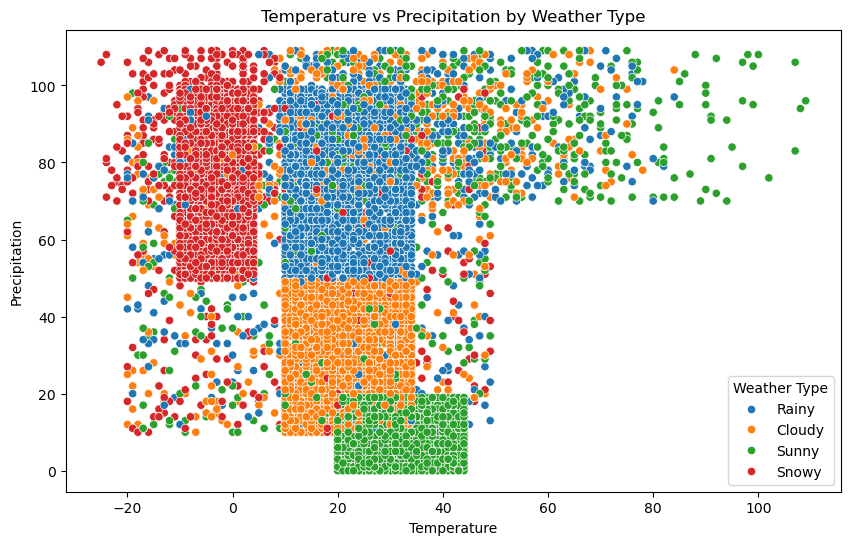

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_df, x='Temperature', y='Precipitation (%)', hue='Weather Type')
plt.title('Temperature vs Precipitation by Weather Type')
plt.xlabel('Temperature')
plt.ylabel('Precipitation')
plt.legend(title='Weather Type')
plt.show()

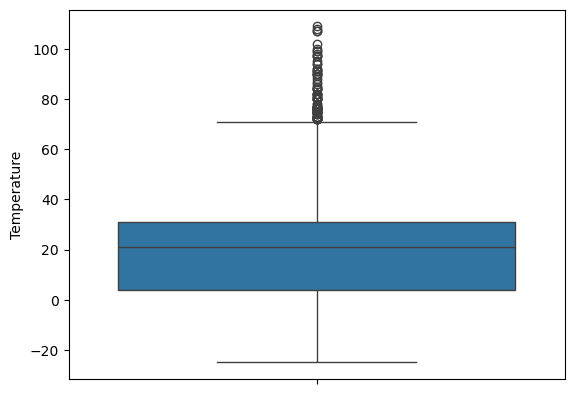

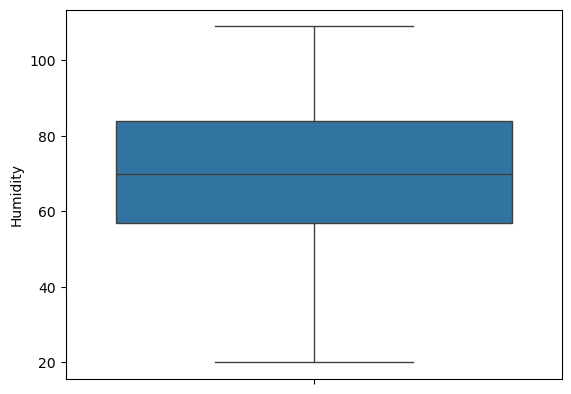

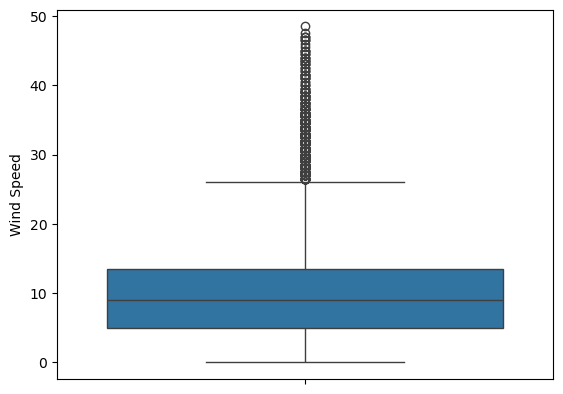

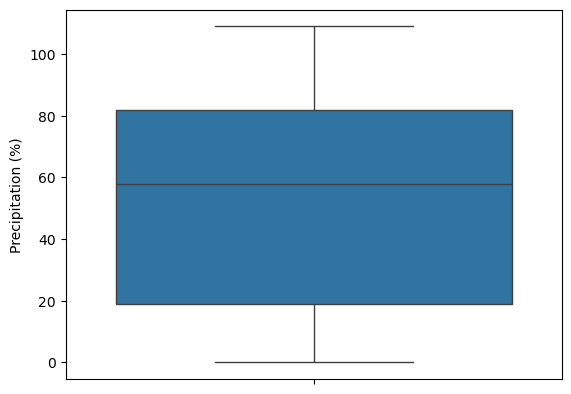

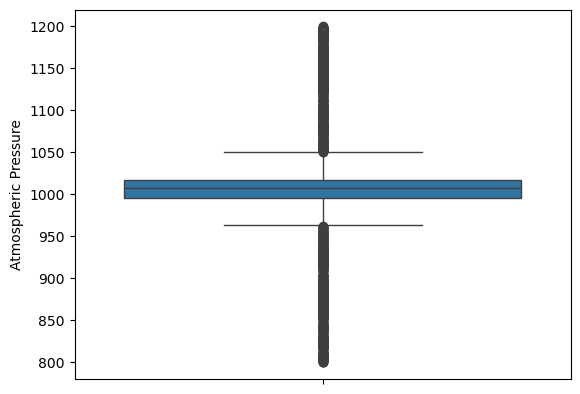

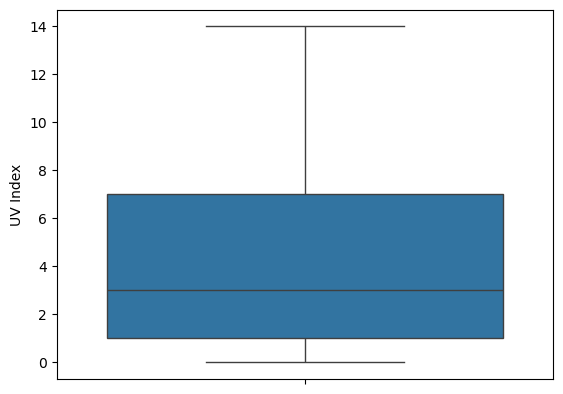

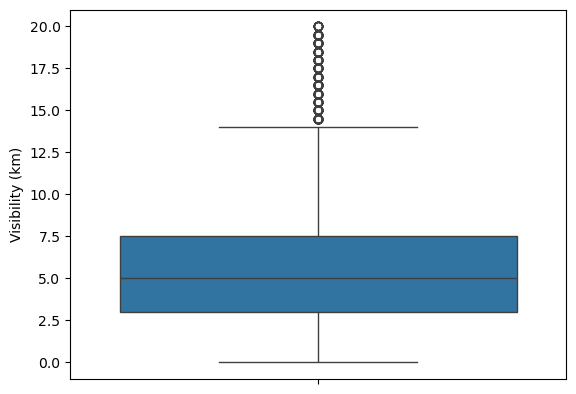

In [347]:
for i in numerical:
    plt.figure()
    sns.boxplot(weather_df[i])

In [361]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(weather_df[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = weather_df[i][(weather_df[i] > ul) | (weather_df[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [363]:
detect_outliers(numerical)

*** Temperature outlier points*** 
 210      78.0
228      73.0
535      80.0
709      74.0
730      76.0
         ... 
12752    90.0
12814    72.0
12878    95.0
13065    97.0
13108    81.0
Name: Temperature, Length: 92, dtype: float64 

*** Humidity outlier points*** 
 Series([], Name: Humidity, dtype: int64) 

*** Wind Speed outlier points*** 
 63       46.5
90       28.5
123      28.0
208      34.0
228      47.0
         ... 
12999    28.5
13066    31.0
13113    32.5
13115    26.5
13176    36.0
Name: Wind Speed, Length: 404, dtype: float64 

*** Precipitation (%) outlier points*** 
 Series([], Name: Precipitation (%), dtype: float64) 

*** Atmospheric Pressure outlier points*** 
 10        879.88
38       1132.20
58       1074.07
72       1063.39
85       1160.48
          ...   
13167     840.06
13168     894.65
13178     822.40
13184    1128.35
13196    1067.23
Name: Atmospheric Pressure, Length: 927, dtype: float64 

*** UV Index outlier points*** 
 Series([], Name: UV Index, dty

let's encode the categorical features namely `Cloud Cover`, `UV Index`, `Season` and `Weather Type` using the LabelEncoder from sklearn module. 

In [237]:
for i in categorical:
    le = LabelEncoder()
    yhat = le.fit_transform(weather_df[i])
    weather_df[i] = yhat


In [239]:
weather_df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


# Model Training

In [365]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

We can observe through the box plot the massive number of outliers present in the dataset especially in Temperature, Wind Speed, Atmospheric Pressure and Visibility. Hence we use `RobustScaling` which can outliers very well for scaling the data.

In [367]:
features = [i for i in weather_df.columns if i!= 'Weather Type']
X = weather_df[features]
y = weather_df['Weather Type']
X_train , X_test, y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

In [369]:
# scaling the data
train_scaler = RobustScaler()
test_scaler = RobustScaler()

X_scaled=train_scaler.fit_transform(X)
X_train_scaled=train_scaler.fit_transform(X_train)
X_test_scaled=test_scaler.fit_transform(X_test)

In [371]:
#converting scaled data into dataframe
X_scaled_df=pd.DataFrame(data=X_scaled,columns=X.columns,index=X.index)
X_scaled_train_df=pd.DataFrame(data=X_train_scaled,columns=X_train.columns,index=X_train.index)
X_scaled_test_df=pd.DataFrame(data=X_test_scaled,columns=X_test.columns,index=X_test.index)

In [373]:
X_scaled_df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,-0.259259,0.111111,0.058824,0.380952,1.0,0.144271,-0.166667,0.5,-0.333333,0.0
1,0.666667,0.962963,-0.058824,0.206349,1.0,0.172033,0.666667,-0.5,1.111111,0.0
2,0.333333,-0.222222,-0.235294,-0.666667,-2.0,0.503812,0.333333,-0.5,0.111111,0.5
3,0.629630,0.481481,-0.882353,0.380952,-2.0,0.846513,0.666667,-0.5,-0.888889,-0.5
4,0.222222,0.148148,0.941176,0.126984,0.0,-0.772784,-0.333333,0.5,-0.555556,0.5


In [375]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'XGBClassifier' : XGBClassifier()
}

model_score = {}
model_trained = {}
model_clf = {}
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_scaled_train_df, y_train)
    model_trained[model_name] = model
    
    # Predict on the test set
    y_pred = model.predict(X_scaled_test_df)
    
    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    model_score[model_name] = accuracy
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    clf = classification_report(y_test, y_pred)
    model_clf[model_name] = clf
    print(clf)
    print("-" * 50)

Model: Random Forest
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       955
           1       0.91      0.92      0.91       982
           2       0.94      0.93      0.93      1033
           3       0.94      0.90      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.92      0.91      0.92      3960

--------------------------------------------------
Model: Support Vector Classifier
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       955
           1       0.89      0.91      0.90       982
           2       0.93      0.94      0.94      1033
           3       0.93      0.91      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weig

Let's train the KNN model with different values of K and plot a model score to observe the performance against values of K.

In [377]:
# knn model
train_scores = []
test_scores = []
k = np.arange(1,31,1)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_scaled_train_df,y_train)
    train_scores.append(knn.score(X_scaled_train_df,y_train))
    test_scores.append(knn.score(X_scaled_test_df,y_test))

Maximum KNN score on the test data : 90.23%


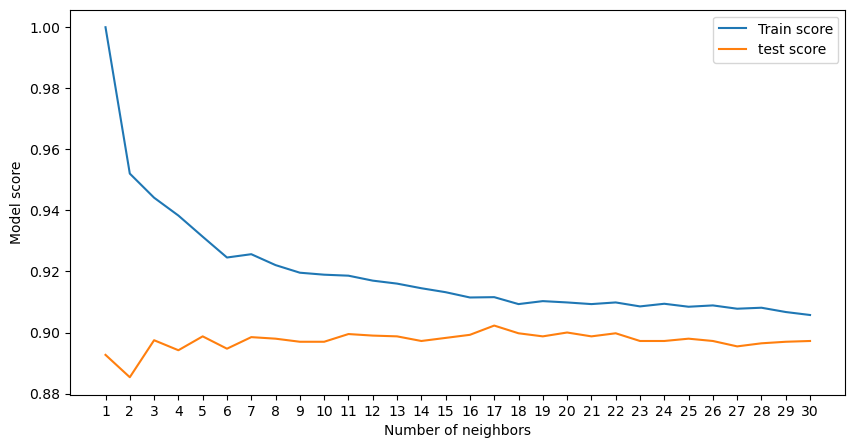

In [378]:
plt.figure(figsize=[10,5])
plt.plot(k,train_scores,label='Train score')
plt.plot(k,test_scores,label='test score')
plt.xticks(np.arange(1,31,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

In [379]:
model_score

{'Random Forest': 0.9148989898989899,
 'Support Vector Classifier': 0.9093434343434343,
 'K-Nearest Neighbors': 0.8987373737373737,
 'Gradient Boosting': 0.906060606060606,
 'Logistic Regression': 0.8338383838383838,
 'XGBClassifier': 0.9123737373737374}

These are the scores of the various models trained.

Now Let's train the Random Forest and Support Vector using GridSearchCV which allows us to do Hyperparameter Tuning.

In [383]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Define parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize models
model_rf = RandomForestClassifier(random_state=42)
model_svc = SVC(random_state=42)

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_scaled_train_df, y_train)

# Perform GridSearchCV for SVC
grid_search_svc = GridSearchCV(estimator=model_svc, param_grid=param_grid_svc, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_svc.fit(X_scaled_train_df, y_train)

# Print best parameters and scores for each model
print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest - Best CV Score:", grid_search_rf.best_score_)
print("SVC - Best Parameters:", grid_search_svc.best_params_)
print("SVC - Best CV Score:", grid_search_svc.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Random Forest - Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Best CV Score: 0.9166666666666667
SVC - Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVC - Best CV Score: 0.9119047619047619


# INSIGHTS
1. **Random Forest Classifier:**
Cross-Validation Score: 91.67%
    * High Accuracy: Random Forest achieves the highest cross-validation score among all models, indicating robust performance in classifying multiple classes based on the provided features.
    * Ensemble Strength: The ensemble nature of Random Forest, combining multiple decision trees, proves effective for handling complex interactions and achieving high predictive accuracy.
    * Parameter Tuning: The chosen parameters suggest that deeper trees (max_depth=None), limited feature consideration per split (max_features='sqrt'), and a moderate number of estimators (n_estimators=200) contribute to its strong performance.

2. **Support Vector Machine:**
Cross-Validation Score: 91.19%
    * SVC achieved the second-highest cross-validation score (91.19%), indicating strong performance but slightly lower than Random Forest.
    * The choice of C=10 suggests a relatively high regularization parameter, with the RBF kernel and automatic gamma setting adapting well to the data.

3. **K-Nearest Neighbors:**
Score: 90.23%
    * Performance: Shows a competitive score but slightly lower compared to Random Forest and SVC.
    * Parameter Sensitivity: Performance influenced by choice of k (number of neighbors) and distance metric used.
    * Local Learning: Relies on local neighborhood information for classification, which can be effective but sensitive to local data structure.

4. **Gradient Boost Classifier:**
Score: 90.61%
    * Performance: Achieves a competitive score close to the top performers.
    * Boosting Effect: Improves model performance iteratively by focusing on correcting errors made by previous models in the ensemble.
    *Ensemble Learning: Utilizes decision trees as base learners, emphasizing the strengths of sequential model building.

5. **Logistic Regression:**
Score : 83.38%
    * Performance: Shows the lowest cross-validation score among all models evaluated.
    * Linear Decision Boundary: Assumes a linear relationship between input features and output, which may not capture complex interactions in the data as effectively.
    * Simplicity and Interpretability: Provides a straightforward probabilistic interpretation but may lack the flexibility of more complex models.
  
6. **XGBoost Classifier:**
Cross-Validation Score: 91.24%
    * Performance: Performs similarly well to Random Forest and SVC.
    * Gradient Boosting: Leverages gradient boosting to improve model performance iteratively.
    * Feature Importance: Capable of handling complex interactions and boosting model performance through feature importance analysis.

# Conclusion
* Each model offers distinct advantages based on their performance and parameter settings. Random Forest, SVC, and XGBoost emerge as top performers, demonstrating strong cross-validation scores above 91%. 
    
* Logistic Regression, while simpler and interpretable, shows limitations in capturing complex data patterns compared to ensemble methods like Random Forest and XGBoost. 

* KNN and Gradient Boosting also perform well but slightly below the top models, emphasizing the importance of model selection based on specific task requirements and dataset characteristics.